In [2]:
from keras.datasets import mnist

In [3]:
from keras.layers import *

In [4]:
from keras.layers.advanced_activations import LeakyReLU

In [5]:
from keras.models import Sequential, Model

In [6]:
from keras.optimizers import Adam

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [8]:
(x_train,_),(_,_) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [9]:
print(x_train.shape)

(60000, 28, 28)


In [10]:
type(x_train)

numpy.ndarray

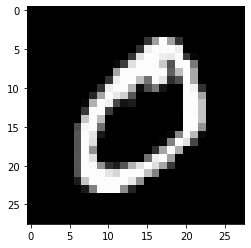

In [11]:
plt.imshow(x_train[1],cmap='gray')

In [12]:
##Normalize the data in [-1,1]
x_train = x_train.astype('float32')

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x_train)

ValueError: ignored

In [59]:
##3-D values can be transformed with STandardScaler
x = (x_train-127.5)/127.5
print(x.min(),x.max())

-1.0 1.0


In [60]:
x.shape

(60000, 28, 28)

In [72]:
total_epochs=50
batch_size=128
no_of_batches = int(x.shape[0]/batch_size)
half_batch =128
noise_dim = 100 ##upsample into 784
adam = Adam(lr=2e-4,beta_1=0.5)  ##special parameters for GAN


In [73]:
##Generator
##input noise 100 dim, outputs vector 784 dim - upsampling

generator = Sequential()
generator.add(Dense(256,input_shape=(noise_dim,)))
generator.add(LeakyReLU(0.2))
generator.add(Dense(512))
generator.add(LeakyReLU(0.2))
generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))
generator.add(Dense(784,activation='tanh'))

generator.compile(loss='binary_crossentropy',optimizer=adam)
generator.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 1024)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 784)              

In [74]:
##Discrimator
##784->1  - downsampling

discriminator = Sequential()
discriminator.add(Dense(512,input_shape=(784,)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(1,activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy',optimizer=adam)
discriminator.summary()



Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_14 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_________________________________________________________________


In [75]:
##GAN
#step 1 - freeze generator, train D
#step 2 - freeze discriminator, train G


In [76]:
##step 2

discriminator.trainable = False
gan_input = Input(shape=(noise_dim,))
generated_img = generator(gan_input)
gan_output = discriminator(generated_img)


In [77]:
##Functional API
model = Model(gan_input, gan_output)
model.compile(loss='binary_crossentropy',optimizer=adam)

In [78]:
type(generator)

tensorflow.python.keras.engine.sequential.Sequential

In [79]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
sequential_4 (Sequential)    (None, 784)               1486352   
_________________________________________________________________
sequential_5 (Sequential)    (None, 1)                 533505    
Total params: 2,019,857
Trainable params: 1,486,352
Non-trainable params: 533,505
_________________________________________________________________


In [80]:
x = x.reshape(-1,784)
x.shape

(60000, 784)

In [82]:
!mkdir images

In [86]:
def save_imgs(epoch,samples=100):
    
    noise = np.random.normal(0,1,size=(samples,noise_dim))
    generated_imgs = generator.predict(noise)
    generated_imgs = generated_imgs.reshape(samples,28,28)
    
    plt.figure(figsize=(10,10))
    for i in range(samples):
        plt.subplot(10,10,i+1)
        plt.imshow(generated_imgs[i],interpolation='nearest',cmap='gray')
        plt.axis("off")
        
    plt.tight_layout()
    plt.savefig('images/gan_output_epoch_{0}.png'.format(epoch+1))
    plt.show()

Epoch 1, D loss is 0.6402, and G loss is 1.0592
Epoch 2, D loss is 0.6416, and G loss is 1.0664
Epoch 3, D loss is 0.6410, and G loss is 1.0640
Epoch 4, D loss is 0.6425, and G loss is 1.0663
Epoch 5, D loss is 0.6408, and G loss is 1.0679


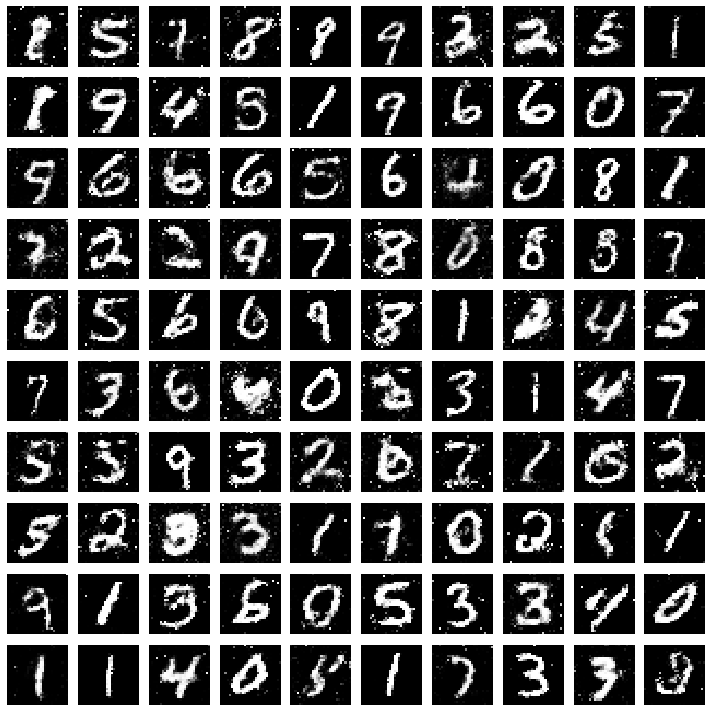

Epoch 6, D loss is 0.6400, and G loss is 1.0655
Epoch 7, D loss is 0.6409, and G loss is 1.0674
Epoch 8, D loss is 0.6410, and G loss is 1.0685
Epoch 9, D loss is 0.6409, and G loss is 1.0666
Epoch 10, D loss is 0.6415, and G loss is 1.0720


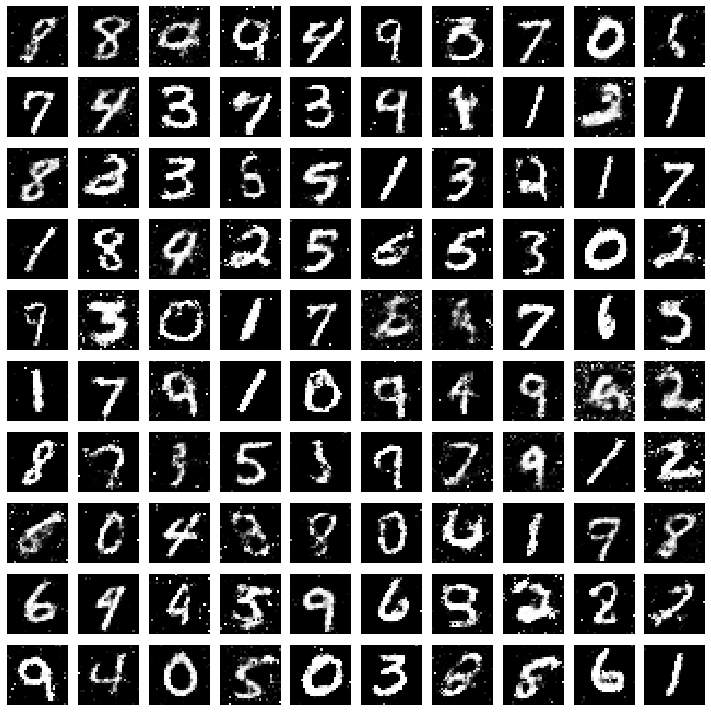

Epoch 11, D loss is 0.6401, and G loss is 1.0697
Epoch 12, D loss is 0.6398, and G loss is 1.0743
Epoch 13, D loss is 0.6411, and G loss is 1.0727
Epoch 14, D loss is 0.6387, and G loss is 1.0761
Epoch 15, D loss is 0.6387, and G loss is 1.0807


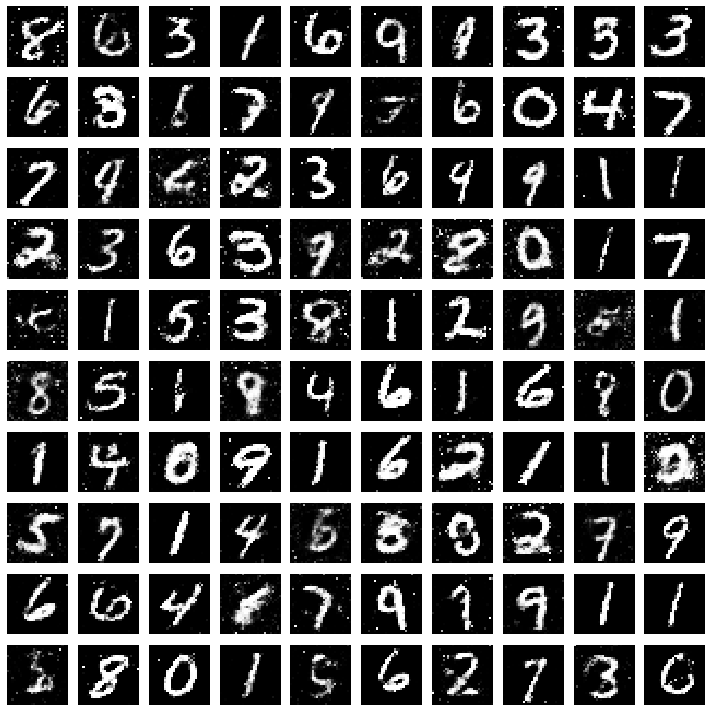

Epoch 16, D loss is 0.6387, and G loss is 1.0802
Epoch 17, D loss is 0.6404, and G loss is 1.0805
Epoch 18, D loss is 0.6396, and G loss is 1.0801
Epoch 19, D loss is 0.6403, and G loss is 1.0799
Epoch 20, D loss is 0.6410, and G loss is 1.0797


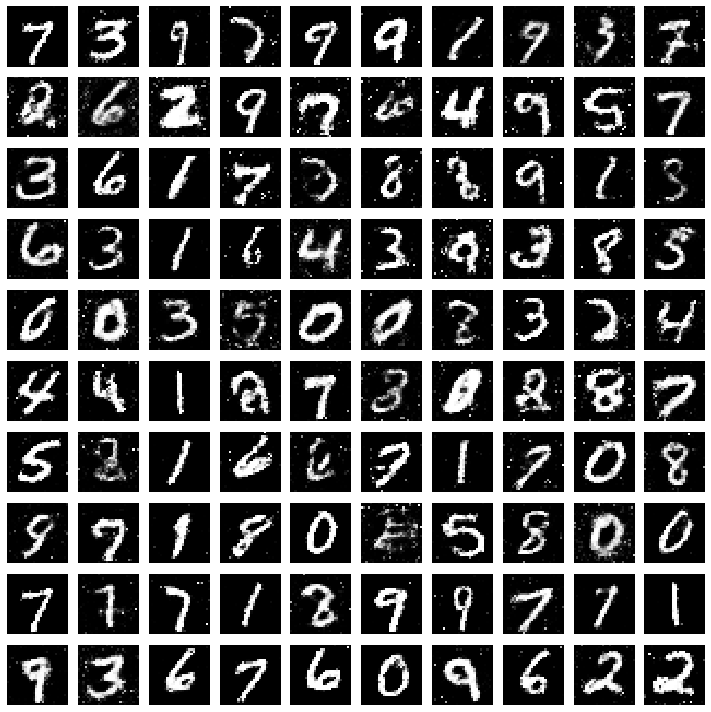

Epoch 21, D loss is 0.6412, and G loss is 1.0841
Epoch 22, D loss is 0.6386, and G loss is 1.0829
Epoch 23, D loss is 0.6382, and G loss is 1.0857
Epoch 24, D loss is 0.6379, and G loss is 1.0867
Epoch 25, D loss is 0.6378, and G loss is 1.0868


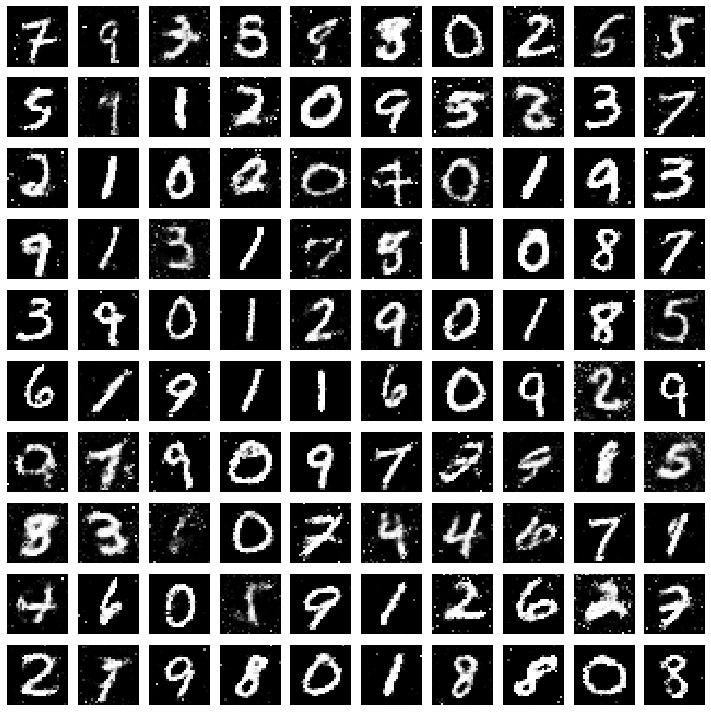

Epoch 26, D loss is 0.6375, and G loss is 1.0903
Epoch 27, D loss is 0.6352, and G loss is 1.0982
Epoch 28, D loss is 0.6354, and G loss is 1.0955
Epoch 29, D loss is 0.6352, and G loss is 1.0972
Epoch 30, D loss is 0.6334, and G loss is 1.1025


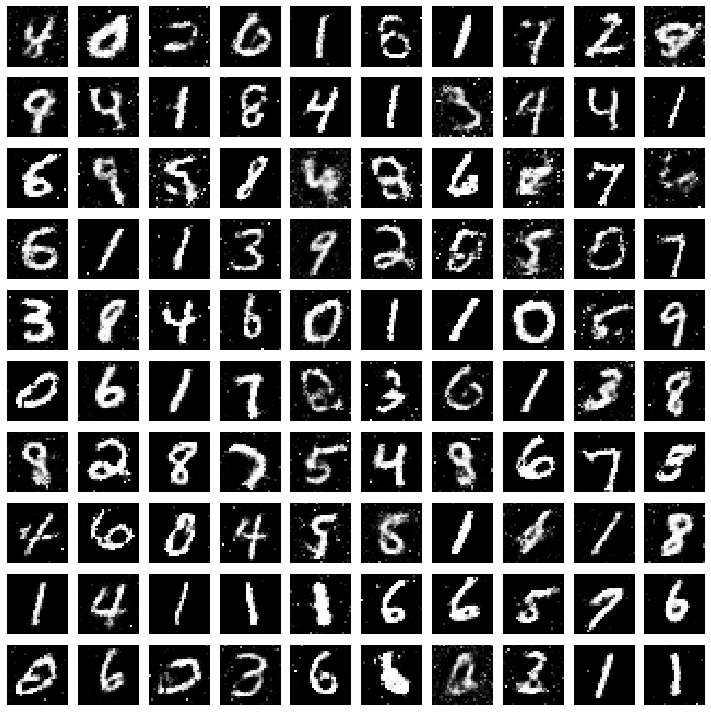

Epoch 31, D loss is 0.6347, and G loss is 1.1012
Epoch 32, D loss is 0.6337, and G loss is 1.1038
Epoch 33, D loss is 0.6333, and G loss is 1.1070
Epoch 34, D loss is 0.6316, and G loss is 1.1092
Epoch 35, D loss is 0.6309, and G loss is 1.1107


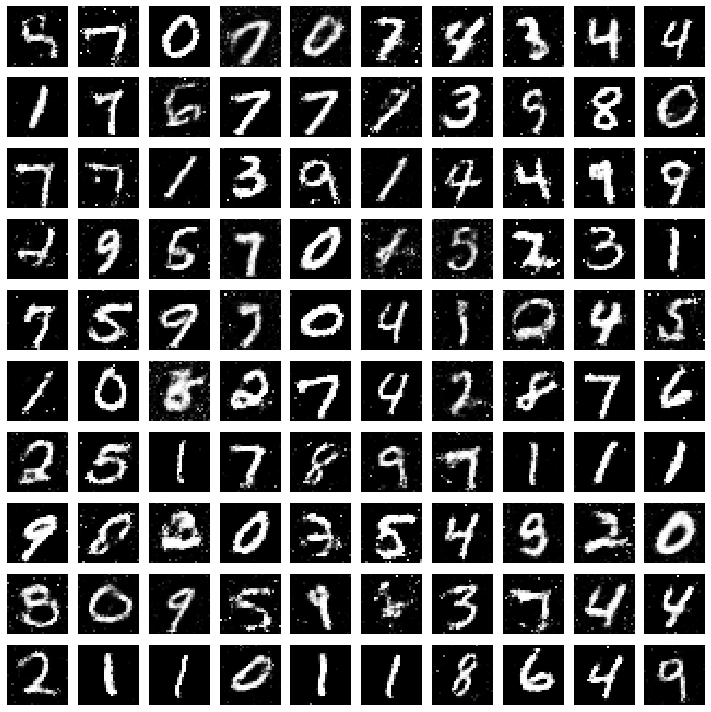

Epoch 36, D loss is 0.6302, and G loss is 1.1133
Epoch 37, D loss is 0.6297, and G loss is 1.1137
Epoch 38, D loss is 0.6308, and G loss is 1.1184
Epoch 39, D loss is 0.6281, and G loss is 1.1211
Epoch 40, D loss is 0.6287, and G loss is 1.1198


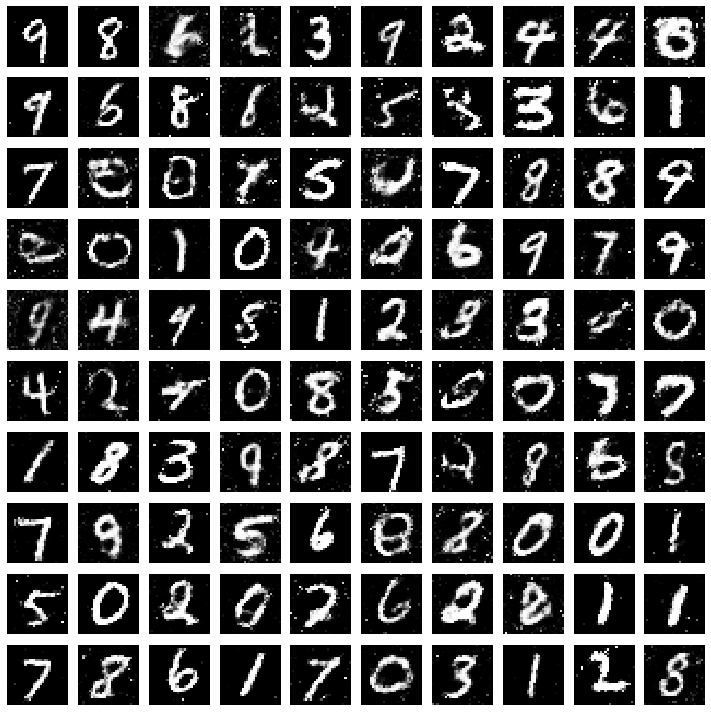

Epoch 41, D loss is 0.6273, and G loss is 1.1232
Epoch 42, D loss is 0.6271, and G loss is 1.1255
Epoch 43, D loss is 0.6280, and G loss is 1.1252
Epoch 44, D loss is 0.6256, and G loss is 1.1331
Epoch 45, D loss is 0.6261, and G loss is 1.1328


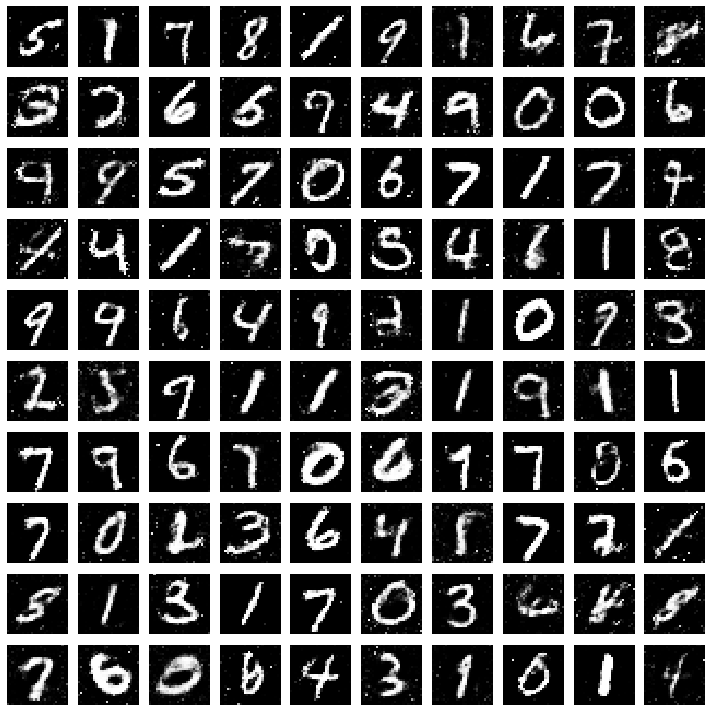

Epoch 46, D loss is 0.6252, and G loss is 1.1420
Epoch 47, D loss is 0.6244, and G loss is 1.1393
Epoch 48, D loss is 0.6247, and G loss is 1.1400
Epoch 49, D loss is 0.6224, and G loss is 1.1396
Epoch 50, D loss is 0.6238, and G loss is 1.1463


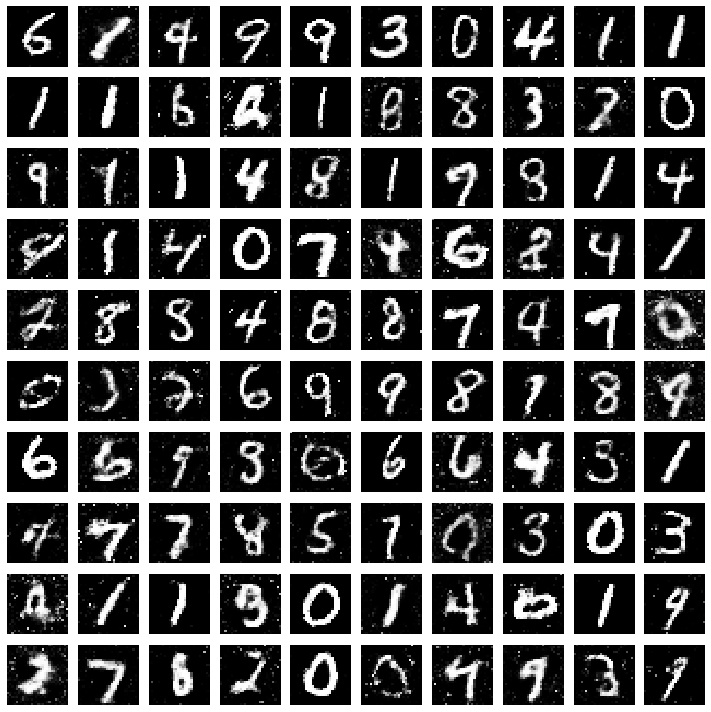

In [87]:
##Training Loop - not as simple as .fit()

for epoch in range(total_epochs):
  epoch_g_loss = 0
  epoch_d_loss = 0

  ##Mini Batch SGD
  for step in range(no_of_batches):

    ##Step-1 Discriminator
    #50% Real Data + 50% Fake Data

    ##Real Data
    idx = np.random.randint(0,x.shape[0],half_batch)
    real_imgs = x[idx]

    ##Fake Data
    noise = np.random.normal(0,1,size=(half_batch,noise_dim))
    fake_imgs = generator.predict(noise)  #Forward

    ##Labels
    real_y = np.ones((half_batch,1))*0.9  #one-sided label smoothing for D
    fake_y = np.zeros((half_batch,1))

    ##Train our Discriminator
    d_loss_real = discriminator.train_on_batch(real_imgs,real_y)
    d_loss_fake = discriminator.train_on_batch(fake_imgs,fake_y)
    d_loss = 0.5*d_loss_real + 0.5*d_loss_fake

    epoch_d_loss += d_loss


    ##Step-2 Training the Generator (considering D frozen)

    noise = np.random.normal(0,1,size=(batch_size,noise_dim))
    ground_truth_y = np.ones((batch_size,1))
    g_loss = model.train_on_batch(noise,ground_truth_y)
    epoch_g_loss += g_loss


  print("Epoch %d, D loss is %.4f, and G loss is %.4f" %((epoch+1),epoch_d_loss/no_of_batches,epoch_g_loss/no_of_batches))
  
  if (epoch+1)%5==0:
        save_imgs(epoch)


In [88]:
!ls

images	sample_data


In [89]:
!zip -r /content/images.zip /content/images

  adding: content/images/ (stored 0%)
  adding: content/images/gan_output_epoch_25.png (deflated 5%)
  adding: content/images/gan_output_epoch_5.png (deflated 6%)
  adding: content/images/gan_output_epoch_50.png (deflated 5%)
  adding: content/images/gan_output_epoch_10.png (deflated 6%)
  adding: content/images/gan_output_epoch_30.png (deflated 6%)
  adding: content/images/gan_output_epoch_15.png (deflated 6%)
  adding: content/images/gan_output_epoch_45.png (deflated 6%)
  adding: content/images/gan_output_epoch_40.png (deflated 5%)
  adding: content/images/gan_output_epoch_20.png (deflated 6%)
  adding: content/images/gan_output_epoch_35.png (deflated 6%)


In [90]:
from google.colab import files
files.download('images.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>